<a href="https://colab.research.google.com/github/ajitpadole/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [ ]:
import pandas as pd
data=pd.read_csv("/content/SeoulBikeData.csv",encoding='latin1')
print(data.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

as we can see there is no any null value by this we can say the dataset is balanced

In [ ]:
# Converting the Data column in Datetime Dtype
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
# Breaking Down the Date into 3 Components
data['Day']=data['Date'].dt.day
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year

# **Univariate** **Analysis**

Text(0.5, 1.0, 'Rented Bike count according to season')

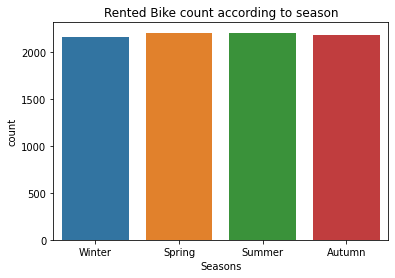

In [ ]:
from seaborn.rcmod import palettes
sns.countplot(data['Seasons']).set_title('Rented Bike count according to season')

In [ ]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'Count According to Holidays')

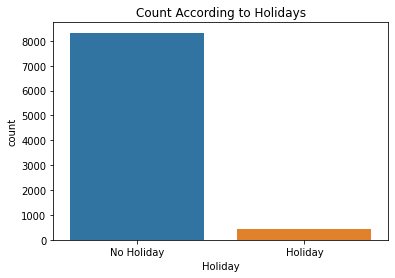

In [ ]:
sns.countplot(data['Holiday']).set_title('Count According to Holidays')

Text(0.5, 1.0, 'Demand by Functioning day')

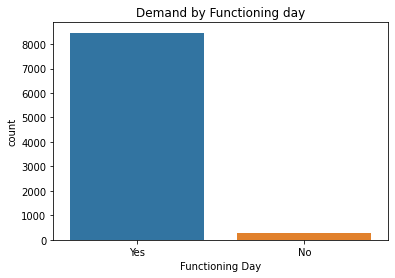

In [ ]:
sns.countplot(data['Functioning Day']).set_title('Demand by Functioning day')

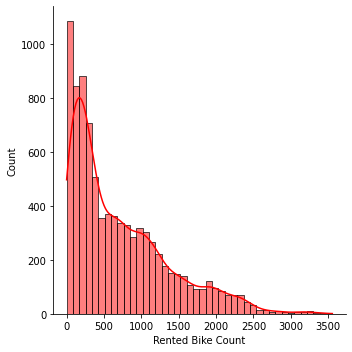

In [ ]:
sns.displot(data['Rented Bike Count'],color="r",kde=True)

<Figure size 648x432 with 0 Axes>

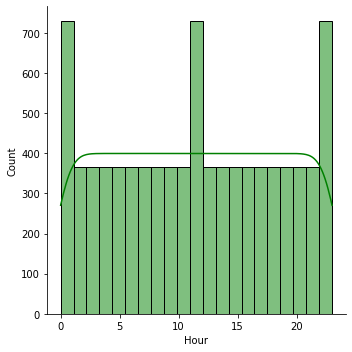

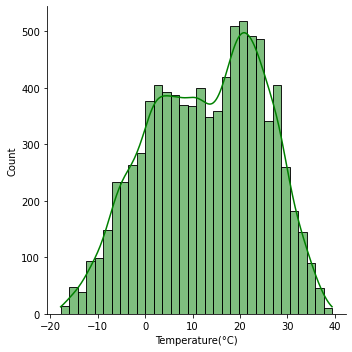

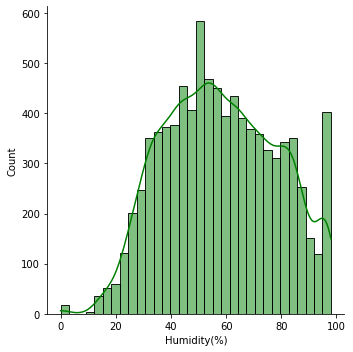

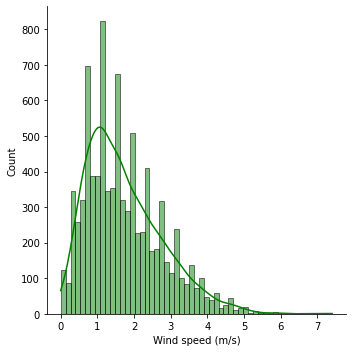

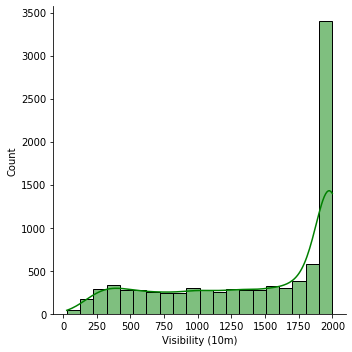

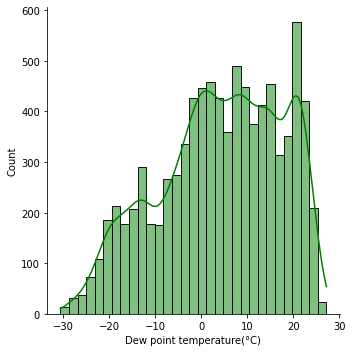

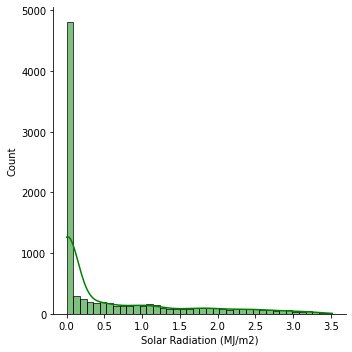

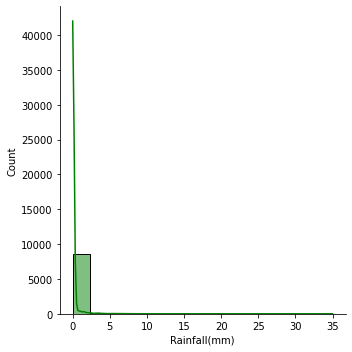

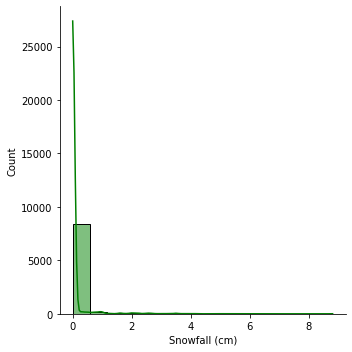

In [ ]:
plt.figure(figsize=(9,6))
lis=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)',
     'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)'
     ,'Rainfall(mm)','Snowfall (cm)']
for i in lis:
  sns.displot(data[i],kde=True,color='g')

In [ ]:
data['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

**Basic Conclusion from Univariate** **Analysis**




*   Booking are mostly similer throughout the seasons.
*   more booking on non holydays and functioning days.


*   not much information at hour.
*   the temprature is mostly grater than zero and let us consider as compare to cold the warm side is more.

*   Wind speed is not extreme.

*   Most of rainfall is less than 4 mm.

*   Snowfall is mostly 0-1 cm and not extreme in most of the cases













### Multivariate Analysis

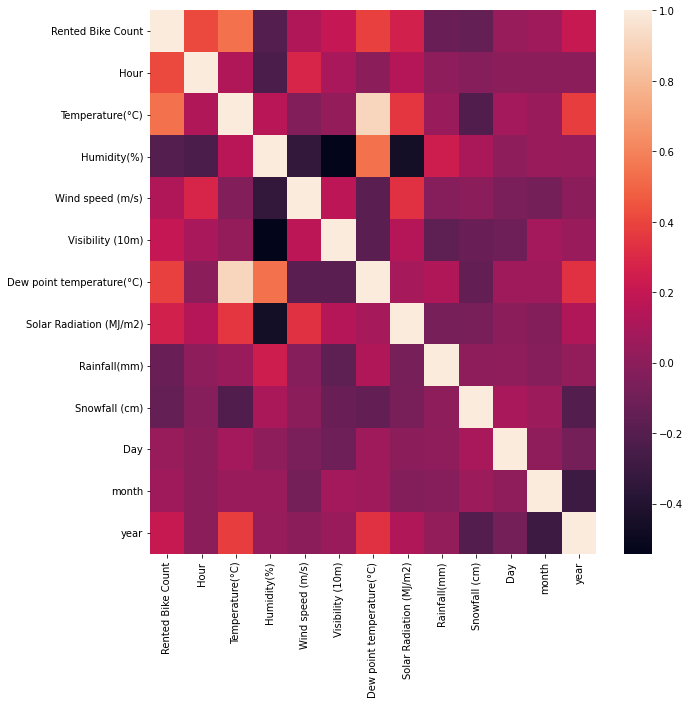

In [ ]:
import seaborn as sns
plt.figure (figsize=(10,10))
sns.heatmap(data.corr())



*   Dew Point is highly corelated with Temerature , dropping Dew point



In [ ]:
df=data.copy()

In [ ]:
df=df.drop(columns=['Dew point temperature(°C)'],axis=1)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,month,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


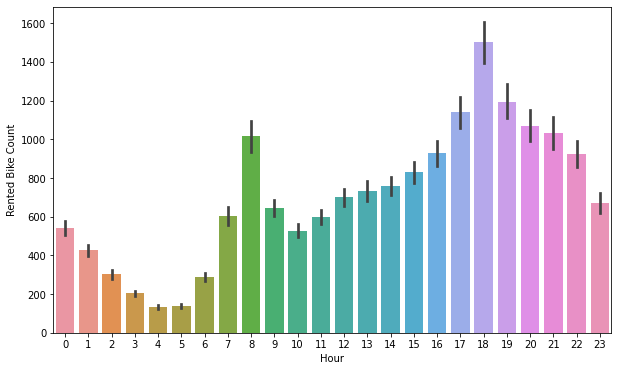

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

In [ ]:
df=pd.get_dummies(df,columns = ['Seasons','Holiday','Functioning Day'])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,...,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,...,11,2018,1,0,0,0,0,1,0,1


In [ ]:
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'month', 'year',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes'],
      dtype='object')

# indipendant and dependant data features


In [ ]:
y = df['Rented Bike Count']
x =df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'month', 'year',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes']]

In [ ]:
x

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018,1,0,0,0,0,1,0,1


In [ ]:
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
X_train

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
1444,4,-11.1,50,1.2,1986,0.00,0.0,0.0,30,1,2018,0,0,0,1,0,1,0,1
1652,20,-5.8,44,2.1,1994,0.00,0.0,0.0,2,7,2018,0,0,0,1,0,1,0,1
7496,8,11.4,66,0.8,1991,0.18,0.0,0.0,10,9,2018,1,0,0,0,1,0,1,0
1893,21,-2.3,38,2.3,2000,0.00,0.0,0.0,17,2,2018,0,0,0,1,1,0,0,1
3880,16,19.1,54,3.2,542,0.94,0.0,0.0,5,11,2018,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,2.0,1201,0.00,0.0,0.0,27,7,2018,0,0,1,0,0,1,0,1
5191,7,23.5,90,0.5,445,0.05,0.5,0.0,7,5,2018,0,0,1,0,0,1,0,1
5390,14,29.5,62,2.7,1941,1.79,0.0,0.0,13,7,2018,0,0,1,0,0,1,0,1
860,20,-3.4,51,1.1,1391,0.00,0.0,0.0,1,5,2018,0,0,0,1,0,1,0,1


In [ ]:
# standerdising data set
scaler = StandardScaler()

In [ ]:
X_train =scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-1.09359218, -2.02557075, -0.40155174, ...,  0.22838997,
        -0.18831089,  0.18831089],
       [ 1.23323198, -1.58026093, -0.69489404, ...,  0.22838997,
        -0.18831089,  0.18831089],
       [-0.51188614, -0.13510455,  0.3806944 , ..., -4.37847606,
         5.31036722, -5.31036722],
       ...,
       [ 0.36067292,  1.38567048,  0.18513286, ...,  0.22838997,
        -0.18831089,  0.18831089],
       [ 1.23323198, -1.37861121, -0.35266136, ...,  0.22838997,
        -0.18831089,  0.18831089],
       [ 1.524085  ,  0.52865914, -0.15709982, ...,  0.22838997,
        -0.18831089,  0.18831089]])

In [ ]:
scaler.inverse_transform(X_train)

array([[  4. , -11.1,  50. , ...,   1. ,   0. ,   1. ],
       [ 20. ,  -5.8,  44. , ...,   1. ,   0. ,   1. ],
       [  8. ,  11.4,  66. , ...,   0. ,   1. ,   0. ],
       ...,
       [ 14. ,  29.5,  62. , ...,   1. ,   0. ,   1. ],
       [ 20. ,  -3.4,  51. , ...,   1. ,   0. ,   1. ],
       [ 22. ,  19.3,  55. , ...,   1. ,   0. ,   1. ]])

In [ ]:
from os import X_OK
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [ ]:
np.mean(mse)

-186182.7258996444

In [ ]:
#prediction
reg_predict = regression.predict(X_test)

In [ ]:
reg_predict

array([ 957.40033435, 1135.5032953 , 1369.58257358, ..., 1185.10520826,
        508.90687415,  720.79380761])

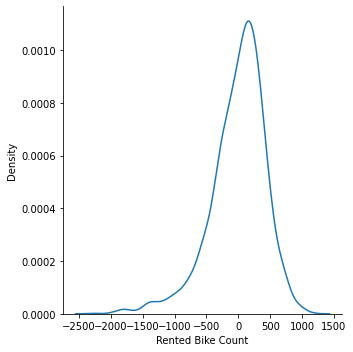

In [ ]:
sns.displot(reg_predict-y_test,kind='kde')

In [2]:
score=r2_score(reg_predict,y_test)

NameError: ignored